## Final Project Submission

Please fill out:
* Student name: Sarah Hodash
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Questions:
* What are the top grossing movies?
* How much do they cost to make?
* What genres do the best at the box office?
* What movies/genres are the highest rated?

In [1]:
import gzip
import csv
import json
import pandas as pd
import numpy as np

Import csv file on movie budgets and create dataframe

In [2]:
df1 = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')
df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Change $ colums to float values to make the dataframe easier to work with

In [3]:
df1[df1.columns[3:]] = df1[df1.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
df1.dtypes

id                     int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object

View top worldwide grossing movies

In [4]:
df1['net_profit'] = df1['worldwide_gross']-df1['production_budget']
df1.sort_values(by='worldwide_gross', ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09


View most profitable movies

In [5]:
df1.sort_values(by='net_profit', ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
66,67,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,1.328723e+09
26,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,1.292936e+09
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09,1.216693e+09
41,42,"Feb 16, 2018",Black Panther,200000000.0,700059566.0,1.348258e+09,1.148258e+09
112,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000.0,417719760.0,1.305773e+09,1.135773e+09


Conclusion: the top 10 highest grossing movies did not change much when taking budget into consideration, looking at net profit overall
* now lets plot budget vs worldwide gross

In [6]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

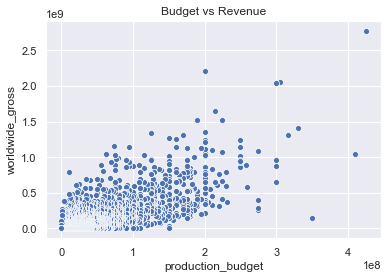

In [7]:
sns.scatterplot(x="production_budget", y="worldwide_gross", data=df1).set(title = 'Budget vs Revenue');

Cut down sample size to look at top 100 most profitable movies

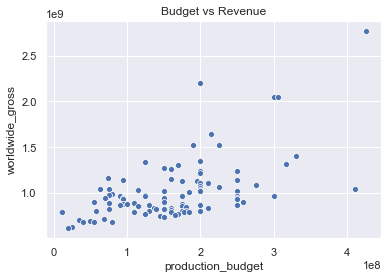

In [8]:
df1_new = df1.sort_values(by='net_profit', ascending = False).head(100)
sns.scatterplot(x="production_budget", y="worldwide_gross", data=df1_new).set(title = 'Budget vs Revenue');

There are a few outliers like Avatar where a massive budget paid off. While there is a general trend of higher budgets leading to higher profits, there is also evidence that some lower budget films are able to be just as profitable as others with a much higher budget (many data points between $100M-$200M had differing profits)

Exploring lower budget movies- what if the production company does not have the funds to start out making high budget films

In [9]:
df1 = df1[df1['production_budget'] < 100000000]

In [10]:
df1.sort_values(by='net_profit', ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
672,73,"Jul 10, 2015",Minions,74000000.0,336045770.0,1.160336e+09,1.086336e+09
425,26,"Dec 17, 2003",The Lord of the Rings: The Return of the King,94000000.0,377845905.0,1.141403e+09,1.047403e+09
824,25,"Jun 11, 1993",Jurassic Park,63000000.0,395708305.0,1.038813e+09,9.758126e+08
629,30,"Jun 30, 2017",Despicable Me 3,75000000.0,264624300.0,1.034728e+09,9.597278e+08
608,9,"Jun 15, 1994",The Lion King,79300000.0,421785283.0,9.862149e+08,9.069149e+08
621,22,"Jul 3, 2013",Despicable Me 2,76000000.0,368065385.0,9.752168e+08,8.992168e+08
437,38,"Dec 20, 2017",Jumanji: Welcome to the Jungle,90000000.0,404508916.0,9.644962e+08,8.744962e+08
692,93,"May 19, 2004",Shrek 2,70000000.0,441226247.0,9.370081e+08,8.670081e+08
424,25,"May 30, 2003",Finding Nemo,94000000.0,380529370.0,9.364294e+08,8.424294e+08
426,27,"Dec 18, 2002",The Lord of the Rings: The Two Towers,94000000.0,342548984.0,9.346996e+08,8.406996e+08


Conclusion: several of these are animated films- this is one option for the production company to explore when starting out

Import file on movie popularity

In [11]:
df2 = pd.read_csv('./zippedData/tmdb.movies.csv.gz')
df2.sort_values(by='popularity', ascending = False).head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20617,20617,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23813,23813,"[878, 28, 53]",335984,en,Blade Runner 2049,48.571,2017-10-06,Blade Runner 2049,7.4,6679
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626


In [12]:
df2.drop_duplicates(subset ="id", keep=False, inplace=True)
df2.sort_values(by='popularity', ascending = False).head(10)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
23814,23814,[12],338952,en,Fantastic Beasts: The Crimes of Grindelwald,48.508,2018-11-16,Fantastic Beasts: The Crimes of Grindelwald,6.9,4870
23815,23815,"[10751, 16, 35, 14, 12]",404368,en,Ralph Breaks the Internet,48.057,2018-11-21,Ralph Breaks the Internet,7.2,2626
20618,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585
20619,20619,"[53, 28, 80]",324552,en,John Wick: Chapter 2,45.253,2017-02-10,John Wick: Chapter 2,7.0,5863


Takeaways: most popular movies seem to be based on comics or books

Import imdb data on movie ratings, titles and genres

In [13]:
df3 = pd.read_csv('./zippedData/imdb.title.ratings.csv.gz')
df3.sort_values(by='tconst', ascending = True).head()

,tconst,averagerating,numvotes
36049,tt0063540,7.0,77
725,tt0066787,7.2,43
18429,tt0069049,6.9,4517
2223,tt0069204,6.1,13
1143,tt0100275,6.5,119


In [14]:
df4 = pd.read_csv('./zippedData/imdb.title.basics.csv.gz')
df4.sort_values(by='tconst', ascending = True).head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Combine two dataframes into one to explore ratings by genre

In [15]:
df3_new=pd.merge(df3, df4, on=['tconst','tconst'])
df3_new.sort_values(by='numvotes', ascending = False).head()
df3_new.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


Only look at movies with a certain number of votes, to avoid looking into films with a small pool of voting data

In [16]:
df3_new = df3_new[df3_new['numvotes'] > 1000000]
df3_new.sort_values(by='averagerating', ascending = False).head(10)
df3_new.head(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
3140,tt1130884,8.1,1005960,Shutter Island,Shutter Island,2010,138.0,"Mystery,Thriller"
8738,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
24920,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
38058,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
39356,tt0993846,8.2,1035358,The Wolf of Wall Street,The Wolf of Wall Street,2013,180.0,"Biography,Crime,Drama"
48221,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
63498,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


Import data on movie gross values by studio

In [17]:
df5 = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')
df5.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [18]:
df5['foreign_gross'] = df5['foreign_gross'].replace('[,]', '', regex=True).astype(float)
df5.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [19]:
df5['worldwide_gross'] = df5['domestic_gross'] + df5['foreign_gross']
df5.sort_values(by='worldwide_gross', ascending = False).head(10)

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


BV (now Disney) made the majority of the top worldwide grossing movies. The production company could look into information on their partners, top talent, budgets etc. do understand how the top studio operates. 

Import data from box office mojo on top grossing genres overall and view data

In [20]:
import pandas as pd

url = 'https://www.boxofficemojo.com/genre/?sort=totalGross&ref_=bo_gs__resort#table'
dfs = pd.read_html(url)

print(len(dfs))

1


In [21]:
print(dfs[0])


            Genre            Total  Titles  \
0      Adaptation  $71,060,334,114     949   
1       Adventure  $66,277,456,355     863   
2    Supernatural  $58,163,827,527     736   
3            IMAX  $55,731,898,158     364   
4              3D  $50,327,404,422     387   
..            ...              ...     ...   
239       Surfing     $223,145,513      27   
240          Golf     $203,990,530      12   
241        Soccer     $188,487,876      25   
242  Brainwashing     $155,496,404       5   
243     Anthology     $146,953,739      36   

                                       #1 Title Lifetime Gross  
0                             Avengers: Endgame   $858,373,000  
1    Star Wars: Episode VII - The Force Awakens   $936,662,225  
2    Star Wars: Episode VII - The Force Awakens   $936,662,225  
3    Star Wars: Episode VII - The Force Awakens   $936,662,225  
4    Star Wars: Episode VII - The Force Awakens   $936,662,225  
..                                          ...          

In [22]:
df = dfs[0]

In [23]:
df = df[['Genre','Total','Titles']].copy()
df.head(10)

,Genre,Total,Titles
0,Adaptation,"$71,060,334,114",949
1,Adventure,"$66,277,456,355",863
2,Supernatural,"$58,163,827,527",736
3,IMAX,"$55,731,898,158",364
4,3D,"$50,327,404,422",387
5,Animation,"$31,466,587,150",697
6,Comic Book Adaptation,"$24,198,480,490",174
7,CGI Animation,"$23,425,173,434",181
8,Superhero,"$22,541,209,697",138
9,Past,"$21,805,523,750",660


In [24]:
df.dtypes

Genre     object
Total     object
Titles     int64
dtype: object

Change gross $ to float and make total easier to plot

In [25]:
df[df.columns[1:]] = df[df.columns[1:]].replace('[\$,]', '', regex=True).astype(float)

In [26]:
df['Total'] = df['Total']/1000000000
df

,Genre,Total,Titles
0,Adaptation,71.060334,949.0
1,Adventure,66.277456,863.0
2,Supernatural,58.163828,736.0
3,IMAX,55.731898,364.0
4,3D,50.327404,387.0
...,...,...,...
239,Surfing,0.223146,27.0
240,Golf,0.203991,12.0
241,Soccer,0.188488,25.0
242,Brainwashing,0.155496,5.0


In [27]:
df_top = df.head(10)

Create visual to see top grossing genres overall

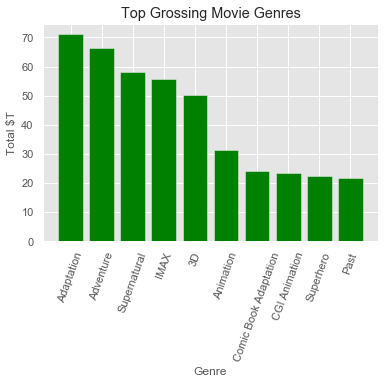

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

x = df_top['Genre']
y = df_top['Total']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x, y, color='green')
plt.xticks(rotation=70)

plt.xlabel("Genre")
plt.ylabel("Total $T")


plt.title("Top Grossing Movie Genres")

plt.show()

Adaptation and adventure movies have made the most money overall.

Import data from box office mojo on top gross values by rating and view data

In [29]:
url = 'https://www.boxofficemojo.com/charts/overall/?area=XWW'
dfs = pd.read_html(url)

print(len(dfs))

3


In [30]:
print(dfs[1])

  Top Lifetime Grosses by MPAA Rating Top Lifetime Grosses by MPAA Rating.1  \
0                                   G                           Toy Story 4   
1                                G/PG                         The Lion King   
2                                  PG                         The Lion King   
3                               PG-13                     Avengers: Endgame   
4                                   R                                 Joker   
5                               NC-17                         Lust, Caution   

  Top Lifetime Grosses by MPAA Rating.2  
0                        $1,073,394,593  
1                        $1,656,943,394  
2                        $1,656,943,394  
3                        $2,797,800,564  
4                        $1,074,251,311  
5                           $67,091,915  


Create dataframe using table from mojo website on top gross values by ratings

In [31]:
df_rating = dfs[1]
df_rating

,Top Lifetime Grosses by MPAA Rating,Top Lifetime Grosses by MPAA Rating.1,Top Lifetime Grosses by MPAA Rating.2
0,G,Toy Story 4,"$1,073,394,593"
1,G/PG,The Lion King,"$1,656,943,394"
2,PG,The Lion King,"$1,656,943,394"
3,PG-13,Avengers: Endgame,"$2,797,800,564"
4,R,Joker,"$1,074,251,311"
5,NC-17,"Lust, Caution","$67,091,915"


Change gross $ to float

In [32]:
df_rating[df_rating.columns[2:]] = df_rating[df_rating.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
df_rating

,Top Lifetime Grosses by MPAA Rating,Top Lifetime Grosses by MPAA Rating.1,Top Lifetime Grosses by MPAA Rating.2
0,G,Toy Story 4,1.073395e+09
1,G/PG,The Lion King,1.656943e+09
2,PG,The Lion King,1.656943e+09
3,PG-13,Avengers: Endgame,2.797801e+09
4,R,Joker,1.074251e+09
5,NC-17,"Lust, Caution",6.709192e+07


Create visual to see lifetime gross of highest in each movie rating

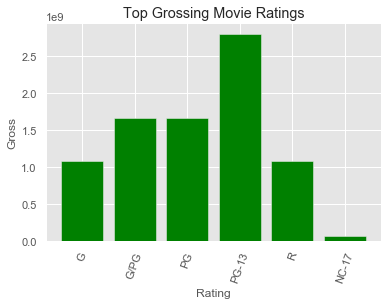

In [33]:
plt.style.use('ggplot')

x = df_rating['Top Lifetime Grosses by MPAA Rating']
y = df_rating['Top Lifetime Grosses by MPAA Rating.2']

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x, y, color='green')
plt.xticks(rotation=70)

plt.xlabel("Rating")
plt.ylabel("Gross")


plt.title("Top Grossing Movie Ratings")

plt.show()

The top grossing PG-13 movie made significantly more than any other rated movie. This may be partially due to a lack of interest in G rated movies, or demographics (less younger movie goers), as well as fewer people being allowed to see R rated movies. 